# Number Classifier

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [7]:
tf.__version__

'2.3.0'

In [8]:
keras.__version__

'2.4.0'

In [9]:
digit_mnist = keras.datasets.mnist

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

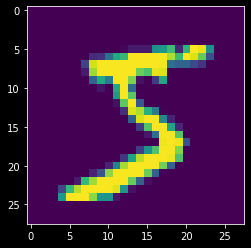

In [11]:
plt.imshow(X_train_full[0])

In [12]:
y_train_full[0]

5

In [13]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
X_train_full = X_train_full/255.
X_test = X_test/255.

In [18]:
x_valid, X_train = X_train_full[:6000], X_train_full[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

## Model 1 with 32 filters

In [22]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="valid", activation="relu",
                               input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(200, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               1081800   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,103,230
Trainable params: 1,103,230
Non-trainable params: 0
____________________________________________

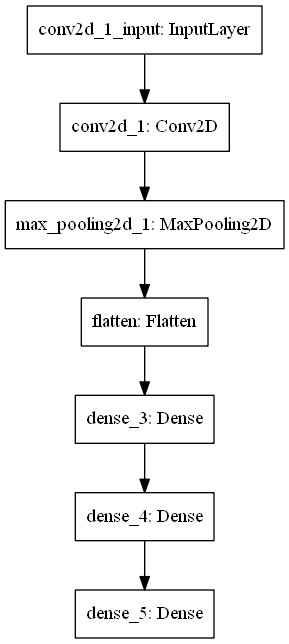

In [27]:
import pydot
keras.utils.plot_model(model_a)

In [26]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [28]:
model_a_history = model_a.fit(X_train, y_train, epochs=60, #batch_size=64
                             validation_data=(x_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 32s 19ms/step - loss: 0.5003 - accuracy: 0.8606 - val_loss: 0.2206 - val_accuracy: 0.9357
Epoch 2/60
1688/1688 [==============================] - 33s 19ms/step - loss: 0.2040 - accuracy: 0.9393 - val_loss: 0.1658 - val_accuracy: 0.9530
Epoch 3/60
1688/1688 [==============================] - 33s 20ms/step - loss: 0.1504 - accuracy: 0.9550 - val_loss: 0.1271 - val_accuracy: 0.9655
Epoch 4/60
1688/1688 [==============================] - 33s 19ms/step - loss: 0.1213 - accuracy: 0.9637 - val_loss: 0.1031 - val_accuracy: 0.9703
Epoch 5/60
1688/1688 [==============================] - 30s 18ms/step - loss: 0.1020 - accuracy: 0.9685 - val_loss: 0.0952 - val_accuracy: 0.9712
Epoch 6/60
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.0828 - val_accuracy: 0.9730
Epoch 7/60
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0773 - accuracy: 0.9761 - val_loss: 0.0963 -

In [29]:
model_a_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [30]:
model_a_history.history

{'loss': [0.5003190636634827,
  0.20399390161037445,
  0.15037770569324493,
  0.12125671654939651,
  0.10200871527194977,
  0.08726629614830017,
  0.07730044424533844,
  0.06867966055870056,
  0.06176476180553436,
  0.05634862557053566,
  0.05053131282329559,
  0.04664928466081619,
  0.041927266865968704,
  0.038358770310878754,
  0.03591792657971382,
  0.03301788866519928,
  0.030277123674750328,
  0.0269280057400465,
  0.025263119488954544,
  0.023444589227437973,
  0.021336007863283157,
  0.019356613978743553,
  0.01896054483950138,
  0.015974752604961395,
  0.015720384195446968,
  0.014428634196519852,
  0.012761152349412441,
  0.01166551187634468,
  0.0108850859105587,
  0.009587095119059086,
  0.008605504408478737,
  0.008937856182456017,
  0.007177025079727173,
  0.006658982019871473,
  0.005682808347046375,
  0.00543988635763526,
  0.005885946098715067,
  0.00439748028293252,
  0.0039873248897492886,
  0.003616779576987028,
  0.003467925125733018,
  0.0030131160747259855,
  0.0

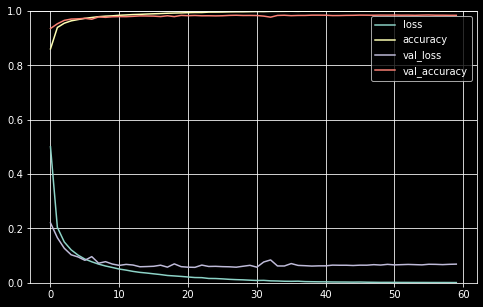

In [32]:
import pandas as pd

pd.DataFrame(model_a_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [31]:
model_a.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0633 - accuracy: 0.9849


[0.06332680583000183, 0.9848999977111816]

## Model 2 with 64 filters

In [33]:
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="valid", activation="relu",
                               input_shape=(28, 28, 1)))
model_b.add(keras.layers.MaxPooling2D((2, 2)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(200, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

In [34]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               2163400   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 2,185,150
Trainable params: 2,185,150
Non-trainable params: 0
____________________________________________

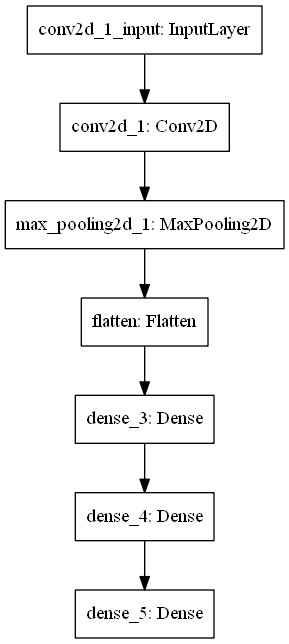

In [35]:
import pydot
keras.utils.plot_model(model_a)

In [36]:
model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
model_b_history = model_b.fit(X_train, y_train, epochs=60, #batch_size=64
                             validation_data=(x_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 70s 41ms/step - loss: 0.4968 - accuracy: 0.8614 - val_loss: 0.2251 - val_accuracy: 0.9323
Epoch 2/60
1688/1688 [==============================] - 47s 28ms/step - loss: 0.2076 - accuracy: 0.9371 - val_loss: 0.1688 - val_accuracy: 0.9520
Epoch 3/60
1688/1688 [==============================] - 47s 28ms/step - loss: 0.1527 - accuracy: 0.9536 - val_loss: 0.1236 - val_accuracy: 0.9642
Epoch 4/60
1688/1688 [==============================] - 44s 26ms/step - loss: 0.1214 - accuracy: 0.9635 - val_loss: 0.1068 - val_accuracy: 0.9705
Epoch 5/60
1688/1688 [==============================] - 42s 25ms/step - loss: 0.1029 - accuracy: 0.9681 - val_loss: 0.0990 - val_accuracy: 0.9682
Epoch 6/60
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0881 - accuracy: 0.9728 - val_loss: 0.0836 - val_accuracy: 0.9752
Epoch 7/60
1688/1688 [==============================] - 47s 28ms/step - loss: 0.0774 - accuracy: 0.9759 - val_loss: 0.0811 -

In [39]:
model_b_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [40]:
model_b_history.history

{'loss': [0.4967549443244934,
  0.2076176106929779,
  0.15271690487861633,
  0.12141110002994537,
  0.10294337570667267,
  0.08811488002538681,
  0.07739764451980591,
  0.06917697191238403,
  0.06273481249809265,
  0.0561242438852787,
  0.050499480217695236,
  0.046551790088415146,
  0.041562288999557495,
  0.03851764276623726,
  0.03526739403605461,
  0.032827962189912796,
  0.029985103756189346,
  0.026663072407245636,
  0.025668932124972343,
  0.02247793599963188,
  0.021677901968359947,
  0.019208500161767006,
  0.019034061580896378,
  0.015855884179472923,
  0.01584150642156601,
  0.014297216199338436,
  0.012421092949807644,
  0.011263863183557987,
  0.010501056909561157,
  0.009736437350511551,
  0.008395499549806118,
  0.008206382393836975,
  0.006930725183337927,
  0.006629931274801493,
  0.005756737664341927,
  0.005411679390817881,
  0.005573528818786144,
  0.004515340551733971,
  0.004348280373960733,
  0.003487559501081705,
  0.0032071189489215612,
  0.0031178498174995184,

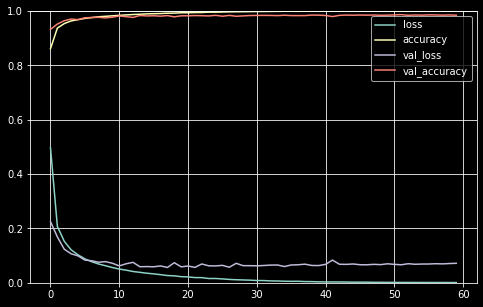

In [41]:
import pandas as pd

pd.DataFrame(model_b_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [42]:
model_b.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0597 - accuracy: 0.9852


[0.05966867133975029, 0.9851999878883362]

In [43]:
model_a.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0633 - accuracy: 0.9849


[0.06332680583000183, 0.9848999977111816]